<a href="https://colab.research.google.com/github/lunatic1580/test/blob/main/%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%93%D0%9F2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import requests
import pandas as pd

# Определение востребованных сфер и профессий (1)

Мы хотим понять, какие вакансии сейчас самые востребованный, чтобы сфокусироваться на них. Мы не облажаем компетенциями во всех сферах, поэтому сформировали список того, что могли бы преподавать (job_titles). Далее мы сделаем выборку вакансиий и посмотрим, какие сферы являются наиболее популярными

In [19]:
url = "https://api.hh.ru/vacancies?area=113"

# список профессий для анализа
job_titles = [
    # IT и разработка
    "Программист", "Разработчик", "DevOps", "Data Scientist",
    "ML Engineer", "AI Engineer", "Backend-разработчик", "Frontend-разработчик",
    "Fullstack-разработчик", "Android-разработчик", "iOS-разработчик",
    "Game Developer", "QA-инженер", "Тестировщик", "Системный администратор",

    # Аналитика и управление
    "Аналитик данных", "BI-аналитик", "Продуктовый аналитик", "Бизнес-аналитик",
    "Финансовый аналитик", "Риск-аналитик", "Маркетинговый аналитик",
    "Продакт-менеджер", "Проектный менеджер", "Менеджер по продажам",

    # Финансы и бухгалтерия
    "Бухгалтер", "Главный бухгалтер", "Финансовый директор", "Экономист",
    "Аудитор", "Кредитный аналитик", "Банковский работник", "Казначей",

    # Маркетинг и PR
    "Маркетолог", "Диджитал-маркетолог", "SMM-менеджер", "Таргетолог",
    "SEO-специалист", "Контент-маркетолог", "PR-менеджер", "Бренд-менеджер",
    "Копирайтер", "E-mail маркетолог",

    # Юриспруденция и HR
    "Юрист", "Адвокат", "Кадровик", "HR", "Рекрутер",

    # Креатив и дизайн
    "Дизайнер", "Графический дизайнер", "Моушн-дизайнер", "UX/UI дизайнер",
    "Иллюстратор", "3D-моделлер", "Фотограф", "Видеооператор"
]

# Словарь для хранения количества вакансий по профессиям
job_counts = {}

# Проходимся по каждой профессии и собираем количество вакансий
for title in job_titles:
    params = {
        "text": title,
        "area": 113,
        "per_page": 1  # Нам нужно только количество вакансий
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        job_counts[title] = data['found']  # Количество найденных вакансий
    else:
        job_counts[title] = 0  # В случае ошибки API

# Сортируем профессии по количеству вакансий
sorted_jobs = sorted(job_counts.items(), key=lambda x: x[1], reverse=True)

# Создаём DataFrame
df_jobstop = pd.DataFrame(sorted_jobs, columns=["Профессия", "Количество вакансий"])


In [13]:
df_jobstop.head(20)

,Профессия,Количество вакансий
0,Менеджер по продажам,112574
1,Разработчик,41461
2,Бухгалтер,27316
3,HR,19965
4,Программист,16219
5,Аналитик данных,14315
6,Аудитор,13536
7,Главный бухгалтер,12950
8,Проектный менеджер,12707
9,Маркетолог,10245


In [ ]:
df_jobstop.shape

(56, 2)

Визуализируем наши данные

/usr/local/lib/python3.11/dist-packages/matplotlib/_api/__init__.py:153: RuntimeWarning: coroutine 'run' was never awaited
  or any(s != t and t is not None for s, t in zip(data_shape, shape))):


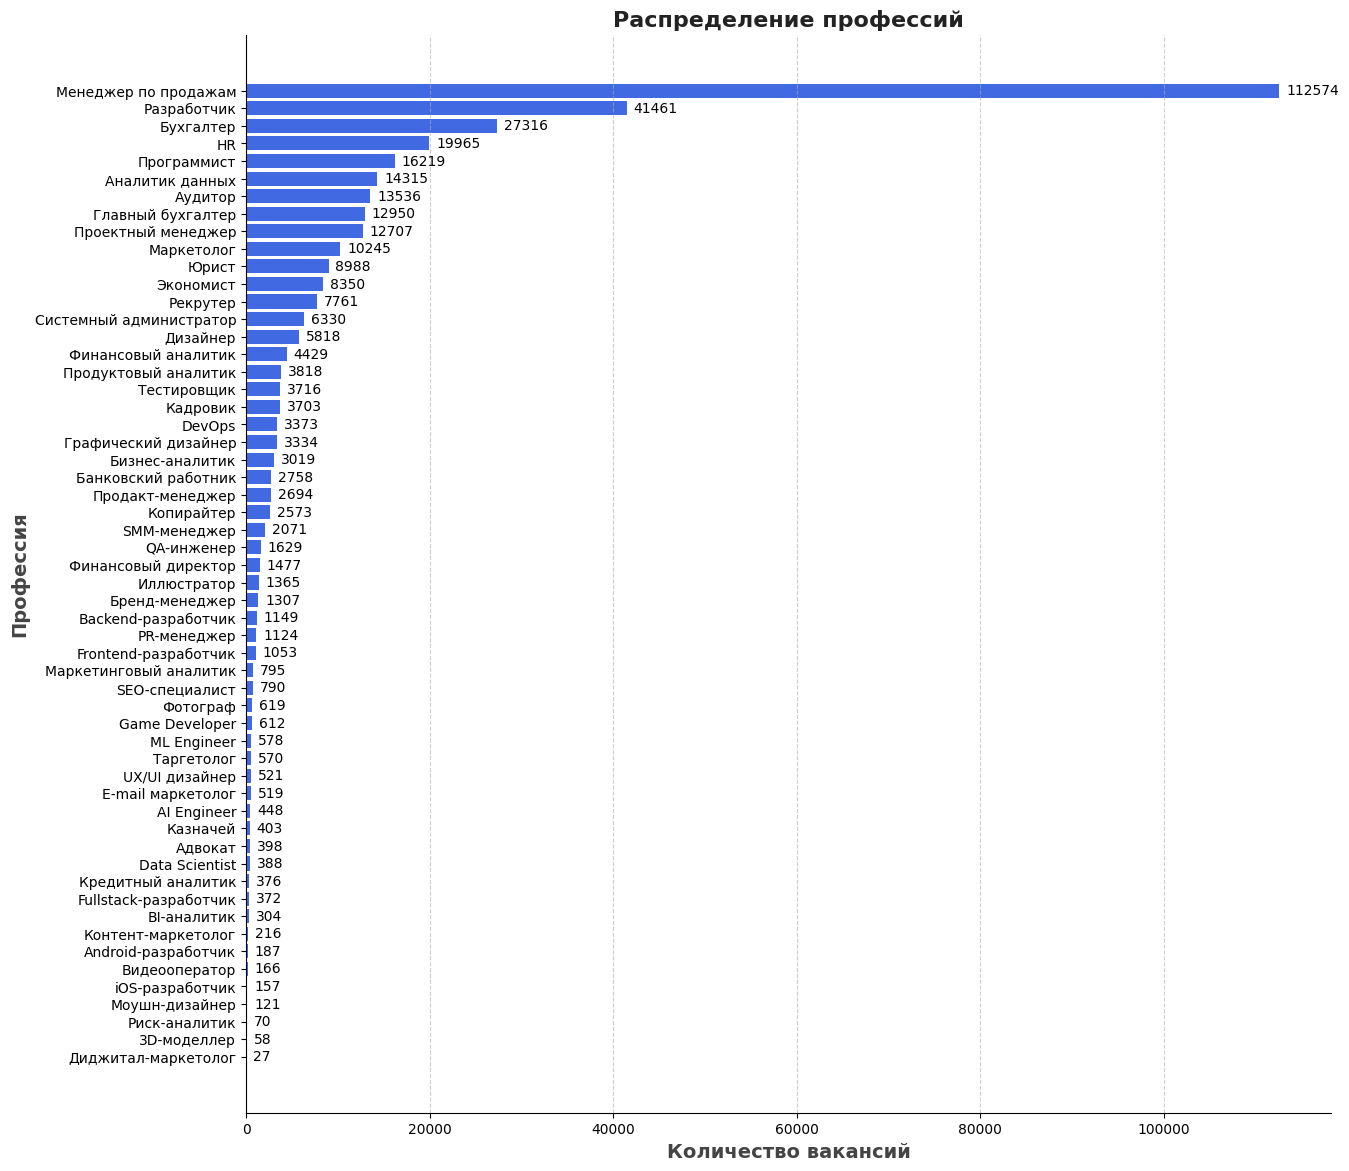

In [14]:
import matplotlib.pyplot as plt

def visualize_job_distribution(df_jobstop):

    # Создаём график
    fig, ax = plt.subplots(figsize=(14, 14))
    bars = ax.barh(df_jobstop["Профессия"], df_jobstop["Количество вакансий"], color="royalblue")

    # Настройки осей и заголовка
    ax.set_xlabel("Количество вакансий", fontsize=14, fontweight="bold", color="#444")
    ax.set_ylabel("Профессия", fontsize=14, fontweight="bold", color="#444")
    ax.set_title(f"Распределение профессий", fontsize=16, fontweight="bold", color="#222")

    # Инвертируем ось Y для удобства чтения
    ax.invert_yaxis()

    ax.bar_label(bars, padding=5, fontsize=10)

    # Убираем лишние границы графика
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.6);
visualize_job_distribution(df_jobstop)

Теперь визуализууем по категориям, чтобы понять, на чём нам сфокусироваться

<ipython-input-10-54dce5679bd3>:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_categories["Категория"], rotation=20, ha="right", fontsize=10)


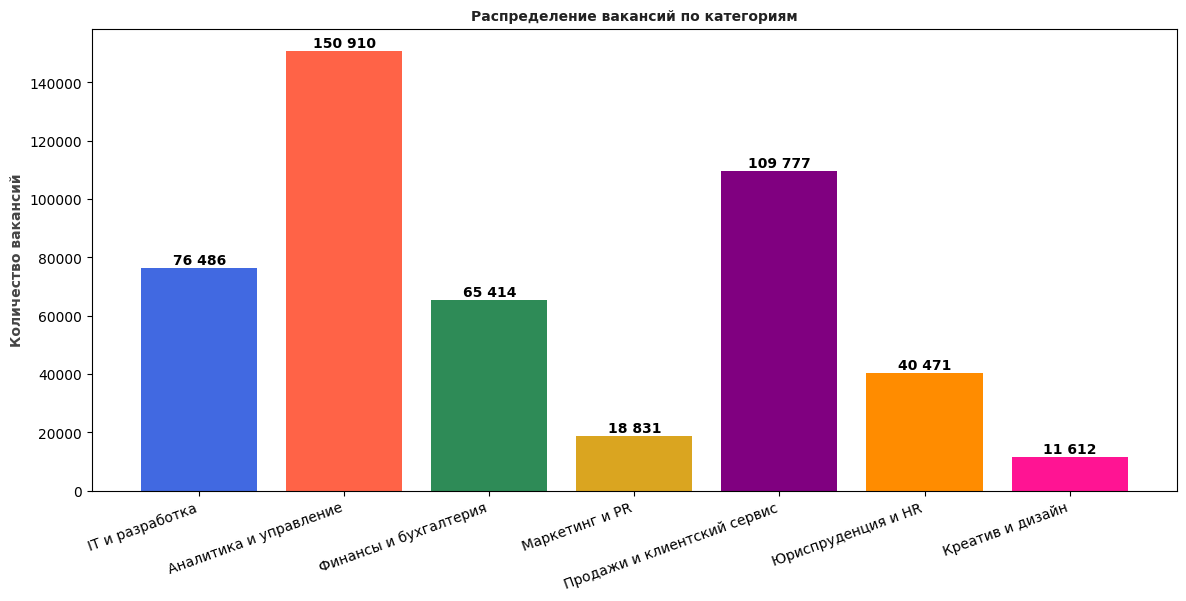

In [ ]:
# Группируем профессии по категориям
job_categories = {
    "IT и разработка": [
        "Программист", "Разработчик", "Инженер", "DevOps", "Data Scientist",
        "ML Engineer", "AI Engineer", "Backend-разработчик", "Frontend-разработчик",
        "Fullstack-разработчик", "Android-разработчик", "iOS-разработчик",
        "Game Developer", "QA-инженер", "Тестировщик", "Системный администратор"
    ],
    "Аналитика и управление": [
        "Аналитик данных", "BI-аналитик", "Продуктовый аналитик", "Бизнес-аналитик",
        "Финансовый аналитик", "Риск-аналитик", "Маркетинговый аналитик",
        "Продакт-менеджер", "Проектный менеджер", "Менеджер по продажам"
    ],
    "Финансы и бухгалтерия": [
        "Бухгалтер", "Главный бухгалтер", "Финансовый директор", "Экономист",
        "Аудитор", "Кредитный аналитик", "Банковский работник", "Казначей"
    ],
    "Маркетинг и PR": [
        "Маркетолог", "Диджитал-маркетолог", "SMM-менеджер", "Таргетолог",
        "SEO-специалист", "Контент-маркетолог", "PR-менеджер", "Бренд-менеджер",
        "Копирайтер", "E-mail маркетолог"
    ],
    "Продажи и клиентский сервис": [
        "Менеджер по продажам", "Аккаунт-менеджер", "Клиентский менеджер",
        "Торговый представитель", "Руководитель отдела продаж", "Оператор call-центра"
    ],
    "Юриспруденция и HR": [
        "Юрист", "Адвокат", "Кадровик", "HR", "Рекрутер"
    ],
    "Креатив и дизайн": [
        "Дизайнер", "Графический дизайнер", "Моушн-дизайнер", "UX/UI дизайнер",
        "Иллюстратор", "3D-моделлер", "Фотограф", "Видеооператор"
    ]
}

# Подсчет реального количества вакансий по категориям из df_jobstop
category_counts = {category: df_jobstop[df_jobstop["Профессия"].isin(professions)]["Количество вакансий"].sum()
                   for category, professions in job_categories.items()}

# Создаем DataFrame
df_categories = pd.DataFrame(list(category_counts.items()), columns=["Категория", "Количество вакансий"])

# Визуализация
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(df_categories["Категория"], df_categories["Количество вакансий"],
              color=["royalblue", "tomato", "seagreen", "goldenrod", "purple", "darkorange", "deeppink"])

# Оформление
ax.set_ylabel("Количество вакансий", fontsize=10, fontweight="bold", color="#444")
ax.set_title("Распределение вакансий по категориям", fontsize=10, fontweight="bold", color="#222")
ax.set_xticklabels(df_categories["Категория"], rotation=20, ha="right", fontsize=10)

# Добавление подписей на столбцы
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f"{int(height):,}".replace(",", " "),
            ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


В результате анализа мы поняли, что будем фокусироваться на первых 3 сферах по популярности

# Анализ альтернативных вакансий для популярных профессий (2) *

Используем только эти сферы, так как они наиболее популярны. Сейчас мы посмотрим релевантные вакансии и дополним каждую из категорий

In [ ]:
import requests
job_categories = {
    "IT и разработка": [
        "Программист", "Разработчик", "Инженер", "DevOps", "Data Scientist",
        "ML Engineer", "AI Engineer", "Backend-разработчик", "Frontend-разработчик",
        "Fullstack-разработчик", "Android-разработчик", "iOS-разработчик",
        "Game Developer", "QA-инженер", "Тестировщик", "Системный администратор"
    ],
    "Аналитика и управление": [
        "Аналитик данных", "BI-аналитик", "Продуктовый аналитик", "Бизнес-аналитик",
        "Финансовый аналитик", "Риск-аналитик", "Маркетинговый аналитик",
        "Продакт-менеджер", "Проектный менеджер", "Менеджер по продажам"
    ],
    "Продажи и клиентский сервис": [
        "Менеджер по продажам", "Аккаунт-менеджер", "Клиентский менеджер",
        "Торговый представитель", "Руководитель отдела продаж", "Оператор call-центра"
    ]
}

# Функция для получения альтернативных вакансий
def get_related_vacancies(vacancy_id):
    url = f"https://api.hh.ru/vacancies/{vacancy_id}/related_vacancies"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json().get('items', [])
    else:
        print(f"Ошибка запроса: {response.status_code}")
        return []

# Получаем ID вакансий по профессиям из job_categories
vacancy_ids = {}
for category, professions in job_categories.items():
    for profession in professions:
        params = {"text": profession, "per_page": 1, "area": 113}
        response = requests.get("https://api.hh.ru/vacancies", params=params)

        if response.status_code == 200 and response.json().get('items'):
            vacancy_ids[profession] = response.json()['items'][0]['id']

# Анализируем альтернативные вакансии и обновляем массив
related_data = []
job_categories_new = job_categories.copy()  # Создаем новый массив для обновления вакансий

for profession, vacancy_id in vacancy_ids.items():
    related_vacancies = get_related_vacancies(vacancy_id)

    for vacancy in related_vacancies:
        # Добавляем новые вакансии в категории
        if vacancy["name"] not in job_categories_new.get(profession, []):
            # Определяем категорию для новой вакансии
            for category in job_categories_new:
                if profession in job_categories_new[category]:
                    job_categories_new[category].append(vacancy["name"])

        # Сохраняем данные для дальнейшего анализа
        related_data.append({
            "Исходная профессия": profession,
            "Альтернативная вакансия": vacancy["name"],
            "Компания": vacancy["employer"]["name"],
            "Город": vacancy["area"]["name"],
            "Зарплата от": vacancy["salary"]["from"] if vacancy["salary"] else None,
            "Зарплата до": vacancy["salary"]["to"] if vacancy["salary"] else None
        })

job_categories_new

{'IT и разработка': ['Программист',
  'Разработчик',
  'Инженер',
  'DevOps',
  'Data Scientist',
  'ML Engineer',
  'AI Engineer',
  'Backend-разработчик',
  'Frontend-разработчик',
  'Fullstack-разработчик',
  'Android-разработчик',
  'iOS-разработчик',
  'Game Developer',
  'QA-инженер',
  'Тестировщик',
  'Системный администратор',
  'Middle React-разработчик',
  'Frontend-разработчик (React)',
  'Frontend-разработчик (React) middle',
  'Frontend-разработчик Middle+ React',
  'Frontend-разработчик (React) middle ЦСС',
  'Middle/Senior Frontend Engineer',
  'Frontend-разработчик',
  'Middle Web-разработчик (FullStack) JavaScript, React',
  'Frontend-разработчик',
  'Frontend-разработчик (React, TypeScript, Capacitor)',
  'Fullstack разработчик (React.Js | Node.Js)',
  'Senior Fullstack web-разработчик',
  'Frontend-разработчик (React)',
  'JS-разработчик (middle/senior)',
  'Frontend Developer (React)',
  'Front-end разработчик JavaScript (React), Middle+',
  'Middle Full Stack Deve

# Анализ работодателей, активно нанимающих сотрудников (3)

Мы понимаем, что при поиске работы опыт очень ценнен, поэтому мы хотим найти компании, у которых есть большое число совбодных вакансий, с рассчётом на то, что именно туда пойдут наши ученики. Есть несколкьо способов как мы будем использовать эту информацию
- Попробуем договориться с компаниями о совместном составлении программы, заточенной под работодателя
- Попробуем организизовать практические кейсы с пользой для компаний
- Подготовим мастерклассы для учеников с инсайдерской информацией по этапам отбора для лидеров на рынке вакансий
....

ТОП-10 Работодателей По Количеству Активных Вакансий:

Загружено 100 компаний...
Загружено 200 компаний...
Загружено 300 компаний...
Загружено 400 компаний...
Загружено 500 компаний...
Загружено 600 компаний...
Загружено 700 компаний...
Загружено 800 компаний...
Загружено 900 компаний...
Загружено 1000 компаний...
Загружено 1100 компаний...
Загружено 1200 компаний...
Загружено 1300 компаний...
Загружено 1400 компаний...
Загружено 1500 компаний...
Загружено 1600 компаний...
Загружено 1700 компаний...
Загружено 1800 компаний...
Загружено 1900 компаний...
Загружено 2000 компаний...
Загружено 2100 компаний...
Загружено 2200 компаний...
Загружено 2300 компаний...
Загружено 2400 компаний...
Загружено 2500 компаний...
Загружено 2600 компаний...
Загружено 2700 компаний...
Загружено 2800 компаний...
Загружено 2900 компаний...
Загружено 3000 компаний...
Загружено 3100 компаний...
Загружено 3200 компаний...
Загружено 3300 компаний...
Загружено 3400 компаний...
Загружено 3500 компаний...
Загружено 3600 компаний...
Загружено 3700 компаний...
Загружено 

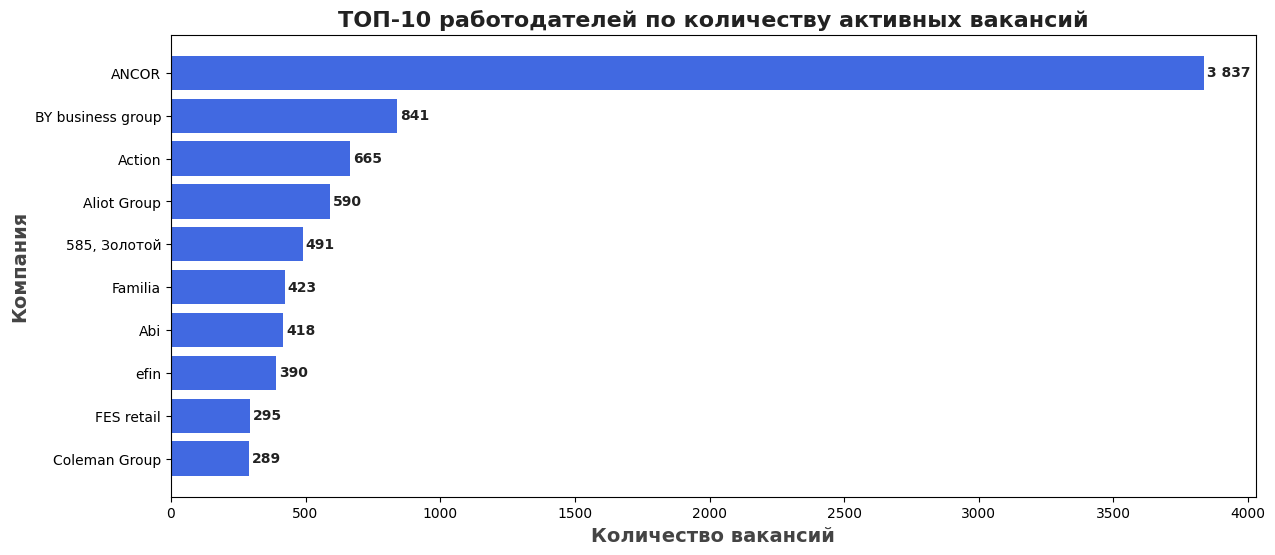

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.hh.ru/employers"


params = {
    "only_with_vacancies": "true",
    "per_page": 100,
    "area": 113,
    "page": 0
}

all_employers = []
while True:
    # Запрос к API
    response = requests.get(url, params=params)

    if response.status_code != 200:
        print("Ошибка запроса:", response.status_code)
        break

    data = response.json()
    employers_list = data.get("items", [])

    all_employers.extend(employers_list)

    print(f"Загружено {len(all_employers)} компаний...")

    # Проверяем, есть ли следующая страница
    if params["page"] >= data.get("pages", 0) - 1:
        break

    params["page"] += 1  # Переход на следующую страницу

# Обрабатываем данные
employers_data = []
for employer in all_employers:
    employers_data.append({
        "Компания": employer["name"],
        "Количество вакансий": employer.get("open_vacancies", 0)
    })

df_employers = pd.DataFrame(employers_data)

# Сортируем по количеству вакансий
df_employers = df_employers.sort_values(by="Количество вакансий", ascending=False)

# Визуализация ТОП-10 компаний
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.barh(df_employers["Компания"][:10], df_employers["Количество вакансий"][:10], color="royalblue")

ax.set_xlabel("Количество вакансий", fontsize=14, fontweight="bold", color="#444")
ax.set_ylabel("Компания", fontsize=14, fontweight="bold", color="#444")
ax.set_title("ТОП-10 работодателей по количеству активных вакансий", fontsize=16, fontweight="bold", color="#222")
ax.invert_yaxis()

# Добавляем подписи к столбцам
for bar in bars:
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height()/2,
            f"{int(width):,}".replace(",", " "), va="center", fontsize=10, color="#222", fontweight="bold")

plt.show()


Мы смогли проанализировать только 5000 компаний, так как далее наши запросы прерывались. Благодаря этому анализу мы выделили компании, которые нас наиболее интересуют

Хотим посомтреть полноценные данные о 100 популярных компаниях, чтобы понять, как мы ещё можем ииспользовать инфомацию

In [ ]:
# Берем работодателей из уже собранных данных
top_10_employers = df_employers.head(100)["Компания"].tolist()

# Эндпоинт API HH.ru для детальной информации о работодателях
url_template = "https://api.hh.ru/employers/{}"

# Список для хранения детальной информации
detailed_employers_data = []

# Проходимся по топ-100 компаниям
for employer_name in top_10_employers:
    # Запрос API для поиска ID работодателя
    search_url = "https://api.hh.ru/employers"
    search_params = {"text": employer_name, "per_page": 1}
    search_response = requests.get(search_url, params=search_params)

    if search_response.status_code == 200:
        search_data = search_response.json()
        if search_data["items"]:
            employer_id = search_data["items"][0]["id"]  # Берем первый ID

            # Теперь получаем детальную информацию
            employer_url = url_template.format(employer_id)
            employer_response = requests.get(employer_url)

            if employer_response.status_code == 200:
                employer_data = employer_response.json()
                detailed_employers_data.append({
                  "Компания": employer_data.get("name"),
                  "ID": employer_data.get("id"),
                  "Количество вакансий": employer_data.get("open_vacancies"),
                  "Город": employer_data.get("area", {}).get("name", "Не указан"),
                  "Сайт": employer_data.get("site_url", "Не указан"),
                  "Тип": employer_data.get("type", "Не указан"),
                  "Описание": employer_data.get("description", "Нет описания"),
                  "Отрасли": [industry["name"] for industry in employer_data.get("industries", [])],
                })

# Создаем DataFrame
df_detailed_employers = pd.DataFrame(detailed_employers_data)

# Выводим данные
df_detailed_employers


,Компания,ID,Количество вакансий,Город,Сайт,Тип,Описание,Отрасли
0,ANCOR,1947314,3838,Москва,https://ancor.ru/,agency,"<p>ANCOR - стаффинговая группа, основанная в 1...",[Кадровые агентства]
1,BY business group,827187,841,Челябинск,http://www.b-urist.ru,agency,<p><strong>Федеральная группа Компаний &quot;Б...,"[Агентские услуги в недвижимости, Кадровые аге..."
2,Action,83056,667,Москва,,company,<p>Action – компания номер один в России на ры...,"[Маркетинговые, рекламные, BTL, дизайнерские, ..."
3,ALIOT GROUP,8974340,0,Сочи,,company,None,"[Мясная продукция (производство), Алкогольные ..."
4,"585, Золотой",916364,491,Санкт-Петербург,http://www.zolotoy.ru,company,<p><strong>Федеральная ювелирная сеть «585*Зол...,"[Розничная сеть (ювелирные изделия), Ювелирные..."
...,...,...,...,...,...,...,...,...
95,AllTime,844,56,Москва,https://www.alltime.ru,company,<p><strong>AllTime.Ru (ООО Олтайм) </strong>&n...,"[Розничная сеть (одежда, обувь, аксессуары), Р..."
96,Bonduelle,51119,56,Краснодарский край,http://bonduelle.ru/,company,<p><strong>ООО «БОНДЮЭЛЬ-КУБАНЬ»</strong> <str...,"[Земледелие, растениеводство, животноводство, ..."
97,Bellini,1087987,55,Красноярск,http://bellinigroup.ru/rest/,company,<p><strong>Bellini Gastronomic Ecosystem – бол...,"[Ресторан, общественное питание, фаст-фуд]"
98,Eqvanta,3785152,55,Ульяновск,http://www.eqvanta.com,company,"<p>Eqvanta &mdash; это группа компаний, работа...",[]


Хотим посмотреть на Отрасли компаний и посчитать их кол-во

                                              Отрасль  Количество
0                                  Кадровые агентства          12
15         Розничная сеть (одежда, обувь, аксессуары)           9
18  Системная интеграция,  автоматизации технологи...           7
17                Разработка программного обеспечения           7
13  Одежда, обувь, аксессуары, текстиль  (продвиже...           6
14  Одежда, обувь, аксессуары, текстиль (производс...           6
29                              Консалтинговые услуги           5
27                            Автомобильные перевозки           4
33           Ресторан, общественное питание, фаст-фуд           4
7                  Розничная сеть (ювелирные изделия)           4
16                                          Гостиница           3
32  Интернет-компания (поисковики, платежные систе...           3
54  Электронно-вычислительная, оптическая, контрол...           3
65  Фармацевтическая продукция (продвижение, оптов...           3
37        

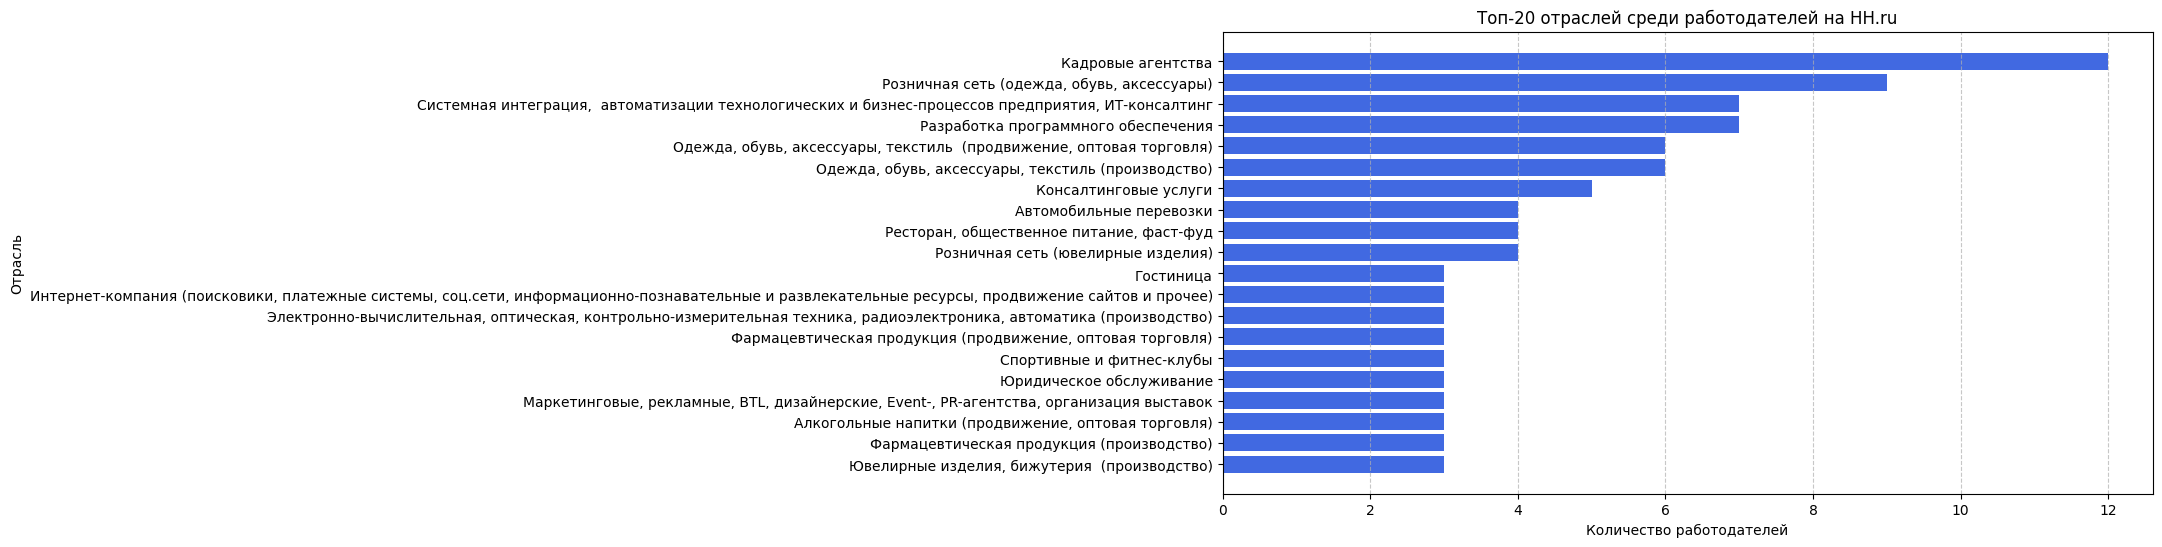

In [ ]:
from collections import Counter

# Проверяем, что df_detailed_employers существует
if "df_detailed_employers" not in locals():
    raise ValueError("DataFrame df_detailed_employers не найден. Убедитесь, что он был создан.")

# Преобразуем строковые значения в списки (если данные хранились как строки)
df_detailed_employers["Отрасли"] = df_detailed_employers["Отрасли"].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Собираем все отрасли в один список
all_industries = [industry for industries in df_detailed_employers["Отрасли"] for industry in industries]

# Подсчитываем количество вхождений каждой отрасли
industry_counts = Counter(all_industries)

# Преобразуем в DataFrame
df_industry_counts = pd.DataFrame(industry_counts.items(), columns=["Отрасль", "Количество"]).sort_values(
    by="Количество", ascending=False
)

# Выводим ТОП-50 отраслей
print(df_industry_counts.head(50))

# Визуализация ТОП-50 отраслей
plt.figure(figsize=(12, 6))
plt.barh(df_industry_counts["Отрасль"].head(20), df_industry_counts["Количество"].head(20), color="royalblue")
plt.xlabel("Количество работодателей")
plt.ylabel("Отрасль")
plt.title("Топ-20 отраслей среди работодателей на HH.ru")
plt.gca().invert_yaxis()  # Переворачиваем ось Y для удобства чтения
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Теперь посомтрим, кто из работодателей является лидером в кажой из сфер по числу вакансий. Это позволит нам грамотно подбирать парнёров. Например, если у нас курс для it, то мы будем искать парнёров с отраслью разработки, если мы учим эйчара, то скорее обратимся в кадровые агентства

In [ ]:
# Определяем ключевые отрасли для анализа на основе ТОП- отраслей для наших трёх выбранных сфер

# Создадим словарь для хранения лидеров в каждой категории
leaders_by_industry = {}

# Проходим по категориям и находим ТОП-5 работодателей в каждой
for category, industries in job_categories_new.items():
    filtered_companies = df_detailed_employers[
        df_detailed_employers["Отрасли"].apply(lambda x: any(ind in industries for ind in x))
    ]

    # Сортируем по количеству вакансий и берём ТОП-5
    top_companies = filtered_companies.sort_values(by="Количество вакансий", ascending=False).head(5)

    # Сохраняем в словарь
    leaders_by_industry[category] = top_companies

# Создаём единый DataFrame с лидерами по категориям
df_leaders = pd.concat(leaders_by_industry.values(), keys=leaders_by_industry.keys(), names=["Категория"])

print(df_leaders)

                                                Компания       ID  \
Категория                                                           
IT и Разработка             12                   BetBoom   866666   
                            22                  1C-Рарус      172   
                            48                   BI.ZONE  2367681   
                            58  Axenix (ранее Accenture)     4080   
                            69                      DSSL     2888   
Аналитика и Управление      20          Assistance Group  2844497   
                            35              Crocus Group    37318   
                            39              Changellenge  1304253   
                            58  Axenix (ранее Accenture)     4080   
                            68    Becar Asset Management    21200   
Продажи и Клиентский сервис 1          BY business group   827187   
                            4               585, Золотой   916364   
                            8     

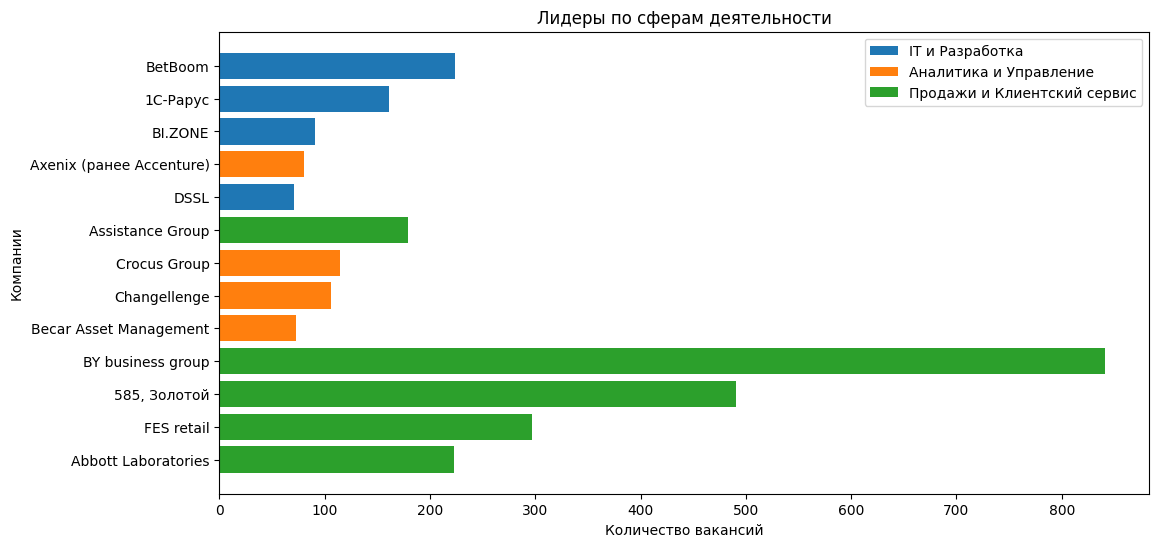

In [ ]:
# Сбрасываем индексы и делаем их последовательными
df_leaders_reset = df_leaders.reset_index()

# Переименовываем столбцы для удобства
df_leaders_reset = df_leaders_reset.rename(columns={"Категория": "Сфера", "Компания": "Лидер компании"})

# Оставляем только нужные столбцы
df_leaders_reset = df_leaders_reset[["Сфера", "Лидер компании", "Количество вакансий"]]


# Визуализация ТОП-5 лидеров в каждой сфере
plt.figure(figsize=(12, 6))
for category in df_leaders_reset["Сфера"].unique():
    subset = df_leaders_reset[df_leaders_reset["Сфера"] == category]
    plt.barh(subset["Лидер компании"], subset["Количество вакансий"], label=category)

plt.xlabel("Количество вакансий")
plt.ylabel("Компании")
plt.title("Лидеры по сферам деятельности")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


# Анализ рынка труда по регионам (решаем где открывать оффлайн точку)

Сначала посмотрим какие города и регионы представлены на hh

In [ ]:
url = "https://api.hh.ru/salary_statistics/dictionaries/salary_areas"

# Отправляем запрос
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    # Извлекаем регионы и города
    regions = []
    for region in data:
        region_name = region.get("name", "Неизвестный регион")
        region_id = region.get("id", "Неизвестный ID")

        for city in region.get("areas", []):
            city_name = city.get("name", "Неизвестный город")
            city_id = city.get("id", "Неизвестный ID")

            regions.append({
                "Регион": region_name,
                "ID региона": region_id,
                "Город": city_name,
                "ID города": city_id
            })

    df_regions = pd.DataFrame(regions)

    df_regions.to_csv("regions_and_cities.csv", index=False, encoding='utf-8')



In [ ]:
df_regions.head()

Теперь, зная какой id у какого региона, мы можем понять в каком регионе наибольшее число открытых вакансий. Это позволит планировать нам открытие оффлайн точек, так как их выгоднее открывать там, где есть спрос на обучение

In [ ]:
import requests
import pandas as pd

url = "https://api.hh.ru/vacancies"

# ID регионов для анализа (Москва, СПб, Новосибирск и др.)
region_ids = [1, 2, 3, 4, 5, 78, 66, 77, 23, 55]

# Список ключевых слов для поиска
keywords = [word.lower() for sublist in job_categories_new.values() for word in sublist]

# Словарь для хранения количества вакансий по регионам
region_vacancies = {}

# Проходим по регионам и собираем данные
for region_id in region_ids:
    total_vacancies = 0

    for keyword in keywords:
        params = {
            "area": region_id,  # ID региона
            "text": keyword,  # Поиск по ключевому слову
            "per_page": 0  # Нам нужно только количество найденных вакансий
        }

        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                total_vacancies += data["found"]  # Суммируем вакансии по ключевым словам
        except Exception as e:
            print(f"Ошибка при запросе для региона {region_id} по слову '{keyword}': {e}")

    # Сохраняем результат
    region_vacancies[region_id] = total_vacancies

# Преобразуем в DataFrame
df_special_regions = pd.DataFrame(list(region_vacancies.items()), columns=["ID региона", "Количество вакансий"])

# Сохраняем в CSV
df_special_regions.to_csv("filtered_vacancies_by_region.csv", index=False, encoding="utf-8")

print("Анализ вакансий по регионам сохранен в filtered_vacancies_by_region.csv")

✅ Анализ вакансий по регионам сохранен в filtered_vacancies_by_region.csv


In [ ]:
df_special_regions.head(10)

,ID региона,Количество вакансий
0,1,66055
1,2,22525
2,3,6414
3,4,5237
4,5,7
5,78,2488
6,66,3718
7,77,963
8,23,913
9,55,381


# Вытянем курсыв алют для корреткного париснка данных с habrcareer

In [ ]:
import requests

def get_exchange_rates():
    """Получает актуальные курсы валют от Центробанка России."""
    url = "https://www.cbr-xml-daily.ru/daily_json.js"
    response = requests.get(url)
    data = response.json()

    return {
        "$": data['Valute']['USD']['Value'],  # Доллар - Рубль
        "€": data['Valute']['EUR']['Value'],  # Евро - Рубль
        "₽": 1  # Рубль - Рубль
    }

# Обновляем курсы валют перед парсингом
EXCHANGE_RATES = get_exchange_rates()
print("🔄 Актуальные курсы валют:", EXCHANGE_RATES)


🔄 Актуальные курсы валют: {'$': 88.2568, '€': 91.5655, '₽': 1}


Теперь спрсим данные с habrcareer

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

BASE_URL = "https://career.habr.com/vacancies?type=all&page="
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

EXCHANGE_RATES = {  # Актуальные курсы валют
    "$": 90,  # Доллар - Рубль
    "€": 97,  # Евро - Рубль
    "₽": 1    # Рубль - Рубль
}

QUALIFICATION_LEVELS = ["Стажёр","Intern", "Junior", "Middle", "Senior", "Lead","Младший","Средний","Старший","Ведущий"]
EXCLUDE_LOCATIONS = {"Полный рабочий день", "Можно удаленно","Неполный рабочий день"}  # Исключаем из локации

vacancy_list = []
max_pages = 50  # Количество страниц для парсинга

for page in range(1, max_pages + 1):
    print(f"🔄 Парсим страницу {page}...")
    response = requests.get(BASE_URL + str(page), headers=HEADERS)
    soup = BeautifulSoup(response.text, "html.parser")

    vacancies = soup.find_all("div", class_="vacancy-card")
    if not vacancies:
        break  # Если вакансий нет, завершаем

    for vacancy in vacancies:
        title = vacancy.find("div", class_="vacancy-card__title").text.strip()
        link = "https://career.habr.com" + vacancy.find("a", class_="vacancy-card__title-link")["href"]
        company = vacancy.find("div", class_="vacancy-card__company-title").text.strip()

        # Локация без лишних значений
        location_raw = vacancy.find("div", class_="vacancy-card__meta").text.strip()
        locations = [loc.strip() for loc in location_raw.split("•") if loc.strip() not in EXCLUDE_LOCATIONS]

        # Рейтинг компании
        rating_tag = vacancy.find("div", class_="vacancy-card__company-rating")
        if rating_tag:
          rating_span = rating_tag.find("span", class_="basic-text--color-emphasized")
          rating = rating_span.text.strip() if rating_span else "Не указано"
        else:
          rating = "Не указано"

        # Определение квалификации
        qualification = "Не указано"
        for level in QUALIFICATION_LEVELS:
            if re.search(level, title, re.IGNORECASE):
                qualification = level
                break

        # Список технологий (список вместо строки)
        tech_stack_tag = vacancy.find("div", class_="vacancy-card__skills")
        tech_stack = tech_stack_tag.text.strip().split(" • ") if tech_stack_tag else []


        # Зарплата (исправленная логика)
        salary_tag = vacancy.find("div", class_="basic-salary")
        min_salary = max_salary = "Не указано"

        if salary_tag:
            salary_text = salary_tag.text.strip()
        else:
            # Если зарплата не найдена, пробуем парсить с полной страницы
            vacancy_response = requests.get(link, headers=HEADERS)
            vacancy_soup = BeautifulSoup(vacancy_response.text, "html.parser")
            salary_tag = vacancy_soup.find("div", class_="basic-salary")
            salary_text = salary_tag.text.strip() if salary_tag else "Не указано"

        if salary_text != "Не указано":
            # Убираем пробелы в числах (например, "300 000 ₽" → "300000 ₽")
            salary_text_cleaned = re.sub(r"(\d)\s(\d)", r"\1\2", salary_text)

            # Извлекаем числа зарплаты
            salary_match = re.findall(r"(\d{1,6})", salary_text_cleaned)

            # Ищем валюту в конце строки
            currency_match = re.search(r"([\$\€₽])$", salary_text_cleaned)
            currency = currency_match.group(1) if currency_match else "₽"  # По умолчанию рубли

            if salary_match:
                salaries = [int(s) * EXCHANGE_RATES[currency] for s in salary_match]

                if "от" in salary_text and "до" in salary_text and len(salaries) == 2:
                    min_salary, max_salary = salaries
                elif "от" in salary_text and len(salaries) == 1:
                    min_salary, max_salary = salaries[0], salaries[0] * 1.2  # Примерный расчёт
                elif "до" in salary_text and len(salaries) == 1:
                    min_salary, max_salary = salaries[0] * 0.8, salaries[0]  # Примерный расчёт
                elif len(salaries) == 1:
                    min_salary = max_salary = salaries[0]

        # Тип занятости
        employment_tag = vacancy.find("div", class_="vacancy-card__meta")
        employment = "Не указано"
        if employment_tag:
            for option in ["Полный рабочий день", "Неполный рабочий день"]:
                if option in employment_tag.text:
                    employment = option
                    break

        # Формат работы (удалёнка или офис)
        meta_info = vacancy.find("div", class_="vacancy-card__meta")
        remote_work = False  # По умолчанию False
        if meta_info:
          remote_tag = meta_info.find("span", string="Можно удаленно")
          remote_work = bool(remote_tag)  # Если найден тег → True

        # Определяем формат работы
        work_format = "Удалёнка" if remote_work else "Офис"

        # Описание вакансии (с полной страницы)
        vacancy_response = requests.get(link, headers=HEADERS)
        vacancy_soup = BeautifulSoup(vacancy_response.text, "html.parser")
        description_tag = vacancy_soup.find("div", class_="style-ugc")
        description = description_tag.text.strip() if description_tag else "Не указано"

        # Дата публикации
        date_posted = vacancy_soup.find("div", class_="vacancy-header__date")
        date_posted = date_posted.text.strip() if date_posted else "Не указано"

        vacancy_list.append({
            "Название": title,
            "Ссылка": link,
            "Компания": company,
            "Рейтинг компании": rating,
            "Квалификация": qualification,
            "Локация": locations,
            "Мин. зарплата (₽)": min_salary,
            "Макс. зарплата (₽)": max_salary,
            "Тип занятости": employment,
            "Формат работы": work_format,
            "Можно удалённо": remote_work,
            "Список технологий": tech_stack,
            "Описание": description,
            "Дата публикации": date_posted
        })

        # Небольшая задержка для предотвращения блокировки
        time.sleep(1)

# Сохраняем в CSV
df = pd.DataFrame(vacancy_list)
df.to_csv("habr_vacancies.csv", index=False, encoding="utf-8-sig")

print("Данные сохранены в файл habr_vacancies_fixed.csv")


🔄 Парсим страницу 1...


KeyboardInterrupt: 

# Парсинг данных с работа ру

In [3]:
!pip install playwright
!playwright installф
!apt-get install -y libgbm-dev

error: unknown command 'installф'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libgbm-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,542 B of archives.
After this operation, 100 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgbm-dev amd64 23.2.1-1ubuntu3.1~22.04.3 [9,542 B]
Fetched 9,542 B in 1s (14.3 kB/s)
Selecting previously unselected package libgbm-dev:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libgbm-dev_23.2.1-1ubuntu3.1~22.04.3_amd64.deb ...
Unpacking libgbm-dev:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...
Setting up libgbm-dev:amd64 (23.2.1-1ubuntu3.1~22.04.3) ...


In [9]:
import asyncio
from playwright.async_api import async_playwright
import pandas as pd

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        # Переходим на страницу Rabota.ru
        await page.goto("https://www.rabota.ru/vacancy/", timeout=90000)

        # Скроллим страницу вниз для подгрузки вакансий
        for _ in range(20):  # Можно увеличить, если вакансии подгружаются дальше
            await page.evaluate("window.scrollTo(0, document.body.scrollHeight)")
            await asyncio.sleep(2)  # Ждем подгрузку

        # Ждем появления карточек вакансий
        await page.wait_for_selector(".vacancy-preview-card", timeout=90000)

        # Собираем список вакансий
        job_listings = await page.query_selector_all(".vacancy-preview-card")

        vacancies = []
        for job in job_listings:
            title = await job.query_selector(".vacancy-preview-card__title")
            company = await job.query_selector(".vacancy-preview-card__company-name")
            location = await job.query_selector(".vacancy-preview-card__location")
            link = await job.query_selector(".vacancy-preview-card__title a")
            experience = await job.query_selector(".vacancy-preview-card__experience")
            skills = await job.query_selector(".vacancy-preview-card__skills")
            description = await job.query_selector(".vacancy-preview-card__description")
            salary = await job.query_selector(".vacancy-preview-card__salary")

            title_text = await title.inner_text() if title else 'Nan'
            company_text = await company.inner_text() if company else 'Nan'
            location_text = await location.inner_text() if location else 'Nan'
            link_text = await link.get_attribute("href") if link else 'Nan'
            experience_text = await experience.inner_text() if experience else 'Nan'
            skills_text = await skills.inner_text() if skills else 'Nan'
            description_text = await description.inner_text() if description else 'Nan'
            salary_text = await salary.inner_text() if salary else 'Nan'

            # Разбираем зарплату (если указана)
            min_salary, max_salary = 'Nan', 'Nan'
            if salary_text != 'Nan':
                salary_parts = salary_text.replace('\xa0', '').split('–')
                if len(salary_parts) == 2:
                    min_salary = salary_parts[0].strip()
                    max_salary = salary_parts[1].strip()
                else:
                    min_salary = salary_parts[0].strip()
                    max_salary = min_salary

            vacancies.append({
                'Название': title_text,
                'Компания': company_text,
                'Локация': location_text,
                'Ссылка': link_text,
                'Опыт': experience_text,
                'Ключевые навыки': skills_text,
                'Описание': description_text,
                'Мин. зарплата (₽)': min_salary,
                'Макс. зарплата (₽)': max_salary
            })

        await browser.close()

        # Сохранение в CSV
        df = pd.DataFrame(vacancies)
        df.to_csv("vacancies_rabota.csv", index=False)

        print("Данные сохранены в vacancies.csv")

# Запуск
if __name__ == "__main__":
    try:
        asyncio.get_running_loop()
        asyncio.create_task(run())
    except RuntimeError:
        asyncio.run(run())

In [ ]:
import pandas as pd
import re

# Загружаем данные
df = pd.read_csv("vacancies.csv")

def split_salary(salary_text):
    """Функция разбирает зарплату на мин и макс значения."""
    if pd.isna(salary_text) or not isinstance(salary_text, str) or salary_text.strip() == "":
        return None, None

    salary_text = salary_text.replace('\xa0', '').replace('руб.', '').strip()
    min_salary, max_salary = None, None

    # Диапазон зарплат (пример: "45000 — 60000")
    match = re.match(r'(\d{2,6})\s*[—-]\s*(\d{2,6})', salary_text)
    if match:
        min_salary = int(match.group(1))
        max_salary = int(match.group(2))
    else:
        # "от 70000" — минимальная зарплата
        match = re.match(r'от\s*(\d{2,6})', salary_text)
        if match:
            min_salary = int(match.group(1))

        # "до 55000" — максимальная зарплата
        match = re.match(r'до\s*(\d{2,6})', salary_text)
        if match:
            max_salary = int(match.group(1))

    return min_salary, max_salary

# Применяем обработку
df[['Мин. зарплата (₽)', 'Макс. зарплата (₽)']] = df['Зарплата'].apply(lambda x: pd.Series(split_salary(x)))

df.drop(columns=['Зарплата'], inplace=True)

# Сохраняем результат
df.to_csv("vacancies_clean.csv", index=False)

print("Обработанный файл сохранен в vacancies_clean.csv")


# Логирование информации

Мы хотим добавить логирование, раз в пять минут проверять новые ванансии на hh
и если там есть вакансии по одной из категорий, то мы логируем информацию, записывая основные данные о вакансии в таблицу

В дальнейшем мы настроим бота для учеников, который будет уведомлять их о целевых вакансиях для них

In [ ]:
!pip install schedule

In [ ]:
import requests
import pandas as pd
import time
import schedule
from datetime import datetime, timedelta

# Глобальный DataFrame для хранения вакансий
job_data = pd.DataFrame(columns=["id", "title", "company", "location", "published_at", "url"])

# Время последнего запроса (изначально 10 минут назад, чтобы получить начальные данные)
last_check_time = datetime.utcnow() - timedelta(minutes=10)

# Функция получения вакансий с hh.ru
def fetch_hh_jobs(search_keywords, area=1, per_page=10):
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": search_keywords,
        "area": area,  # 1 - Москва
        "per_page": per_page,
        "order_by": "publication_time"
    }
    response = requests.get(url, params=params)
    return response.json()["items"] if response.status_code == 200 else []

# Функция логирования вакансий в DataFrame с учётом времени запуска
def log_jobs_to_dataframe(jobs):
    global job_data, last_check_time
    existing_ids = set(job_data["id"])  # ID уже сохранённых вакансий
    new_entries = []

    for job in jobs:
        job_id = job["id"]
        job_time = datetime.strptime(job["published_at"], "%Y-%m-%dT%H:%M:%S%z").replace(tzinfo=None)

        # Добавляем вакансию, если она новая и опубликована после последней проверки
        if job_id not in existing_ids and job_time > last_check_time:
            new_entries.append({
                "id": job_id,
                "title": job["name"],
                "company": job["employer"]["name"],
                "location": job["area"]["name"],
                "published_at": job["published_at"],
                "url": job["alternate_url"]
            })

    if new_entries:
        job_data = pd.concat([job_data, pd.DataFrame(new_entries)], ignore_index=True)
        print(f'Добавлено {len(new_entries)} новых вакансий.')
    else:
        print("Новых вакансий нет.")

    # Обновляем время последней проверки
    last_check_time = datetime.utcnow()

# Основной цикл работы
def job_logger():
    keywords = "Python разработчик"  # Можно изменить
    jobs = fetch_hh_jobs(keywords)
    if jobs:
        log_jobs_to_dataframe(jobs)
    else:
        print("Ошибка при получении вакансий")

# Запуск парсинга каждые 5 минут
schedule.every(5).minutes.do(job_logger)

while True:
    schedule.run_pending()
    time.sleep(60)


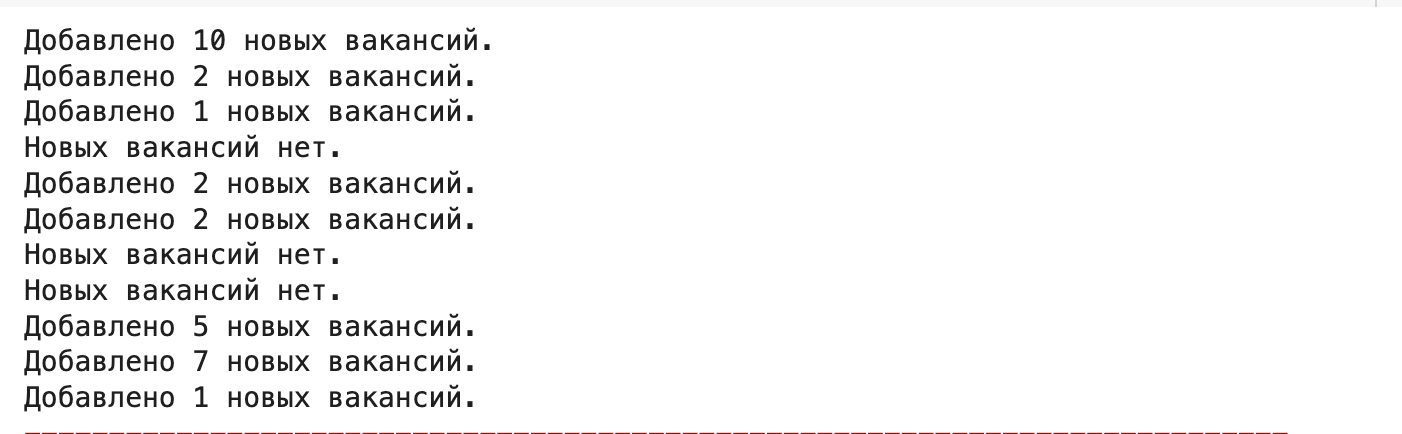

In [ ]:
job_data.head()

# Выводы перед формированием финального датасета

В результате анализа мы определили сферы, в которых наибольшее кол-во вакансий, это IT, Продажи и клиентский сервис. Далее будем рассматривать вакансии только в этих сферах.

Также мы хотим понять, в каком из регионов лучше октрыть оффлайн точку (там, где наибольший спрос)

    1: "Москва",
    
    2: "Санкт-Петербург",

Мы определили регионы, в которых наибольшее кол-во открытых вакансий

# Формирование финального eda

In [ ]:
jobs = pd.read_csv('/content/job_categories_new.csv')

In [ ]:
jobs_prof = jobs['Профессия'][:5]

In [ ]:
jobs_2 = jobs['Профессия'][5:20]

In [ ]:
jobs_3 = jobs['Профессия'][20:100]

In [ ]:
jobs_4 = jobs['Профессия'][100:400]

In [ ]:
jobs_5 = jobs['Профессия'][400:]

In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    session = requests.Session()
    retries = Retry(
        total=5,
        backoff_factor=2,
        status_forcelist=[500, 502, 503, 504],
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    })
    return session

def fetch_vacancies(search_text, area_id=113, per_page=50, max_pages=5):
    session = create_session()
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []
    page = 0

    while page < max_pages:
        params = {
            "text": search_text,
            "area": area_id,
            "per_page": per_page,
            "page": page
        }

        try:
            response = session.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            all_vacancies.extend(data['items'])

            if page + 1 >= data['pages']:
                break

            page += 1
            time.sleep(3)  # Увеличенная задержка

        except requests.exceptions.ConnectionError:
            print(" Сервер разорвал соединение, ждем 10 секунд...")
            time.sleep(10)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}. Ожидание 5 сек перед повтором...")
            time.sleep(5)

    return all_vacancies

if name == "main":
  for prof in jobs_prof:
    search_text = prof

    vacancies = fetch_vacancies(search_text)

    vacancies_data = []
    session = create_session()

    for vacancy in vacancies:
        name = vacancy.get('name', 'Название не указано')
        employer = vacancy.get('employer', {}).get('name', 'Компания не указана')
        city = vacancy.get('area', {}).get('name', 'Город не указан')
        url = vacancy.get('alternate_url', 'Ссылка не указана')
        experience = vacancy.get('experience', {}).get('name', 'Опыт не указан')

        try:
            vacancy_response = session.get(vacancy['url'], timeout=10)
            vacancy_response.raise_for_status()
            vacancy_data = vacancy_response.json()
            description = vacancy_data.get('description', '')
            key_skills = [skill['name'].lower() for skill in vacancy_data.get('key_skills', [])]
        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение при получении деталей вакансии, ждем 10 секунд...")
            time.sleep(10)
            description = ''
            key_skills = []
        except requests.exceptions.RequestException:
            description = ''
            key_skills = []

        salary_info = vacancy.get('salary') or {}
        salary_from = salary_info.get('from', 'Не указано')
        salary_to = salary_info.get('to', 'Не указано')
        salary = f"{salary_from} - {salary_to}" if salary_from != "Не указано" or salary_to != "Не указано" else "Зарплата не указана"

        vacancies_data.append({
            "Название": name,
            "Зарплата": salary,
            "Компания": employer,
            "Город": city,
            "Ссылка": url,
            "Опыт": experience,
            "Ключевые навыки": ", ".join(key_skills) if key_skills else "Не указаны",
            "Описание": description
        })

    # Сохраняем данные в CSV без перезаписи
    df = pd.DataFrame(vacancies_data)
    file_name = "vacancies.csv"

    if not df.empty:
        if not pd.io.common.file_exists(file_name):  # Если файла нет, создаем его с заголовками
            df.to_csv(file_name, index=False, encoding='utf-8', mode='w', header=True)
        else:  # Если файл уже существует, добавляем данные без заголовков
            df.to_csv(file_name, index=False, encoding='utf-8', mode='a', header=False)

    print(f"Данные для профессии '{prof}' добавлены в {file_name}")

In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    session = requests.Session()
    retries = Retry(
        total=5,
        backoff_factor=2,
        status_forcelist=[500, 502, 503, 504],
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    })
    return session

def fetch_vacancies(search_text, area_id=113, per_page=50, max_pages=5):
    session = create_session()
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []
    page = 0

    while page < max_pages:
        params = {
            "text": search_text,
            "area": area_id,
            "per_page": per_page,
            "page": page
        }

        try:
            response = session.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            all_vacancies.extend(data['items'])

            if page + 1 >= data['pages']:
                break

            page += 1
            time.sleep(3)  # Увеличенная задержка

        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение, ждем 10 секунд...")
            time.sleep(10)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}. Ожидание 5 сек перед повтором...")
            time.sleep(5)

    return all_vacancies

if name == "main":
  for prof in jobs_2:
    search_text = prof

    vacancies = fetch_vacancies(search_text)

    vacancies_data = []
    session = create_session()

    for vacancy in vacancies:
        name = vacancy.get('name', 'Название не указано')
        employer = vacancy.get('employer', {}).get('name', 'Компания не указана')
        city = vacancy.get('area', {}).get('name', 'Город не указан')
        url = vacancy.get('alternate_url', 'Ссылка не указана')
        experience = vacancy.get('experience', {}).get('name', 'Опыт не указан')

        try:
            vacancy_response = session.get(vacancy['url'], timeout=10)
            vacancy_response.raise_for_status()
            vacancy_data = vacancy_response.json()
            description = vacancy_data.get('description', '')
            key_skills = [skill['name'].lower() for skill in vacancy_data.get('key_skills', [])]
        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение при получении деталей вакансии, ждем 10 секунд...")
            time.sleep(10)
            description = ''
            key_skills = []
        except requests.exceptions.RequestException:
            description = ''
            key_skills = []

        salary_info = vacancy.get('salary') or {}
        salary_from = salary_info.get('from', 'Не указано')
        salary_to = salary_info.get('to', 'Не указано')
        salary = f"{salary_from} - {salary_to}" if salary_from != "Не указано" or salary_to != "Не указано" else "Зарплата не указана"

        vacancies_data.append({
            "Название": name,
            "Зарплата": salary,
            "Компания": employer,
            "Город": city,
            "Ссылка": url,
            "Опыт": experience,
            "Ключевые навыки": ", ".join(key_skills) if key_skills else "Не указаны",
            "Описание": description
        })

    # Сохраняем данные в CSV без перезаписи
    df = pd.DataFrame(vacancies_data)
    file_name = "vacancies.csv"

    if not df.empty:
        if not pd.io.common.file_exists(file_name):  # Если файла нет, создаем его с заголовками
            df.to_csv(file_name, index=False, encoding='utf-8', mode='w', header=True)
        else:  # Если файл уже существует, добавляем данные без заголовков
            df.to_csv(file_name, index=False, encoding='utf-8', mode='a', header=False)

    print(f"Данные для профессии '{prof}' добавлены в {file_name}")

In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    session = requests.Session()
    retries = Retry(
        total=5,
        backoff_factor=2,
        status_forcelist=[500, 502, 503, 504],
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    })
    return session

def fetch_vacancies(search_text, area_id=113, per_page=50, max_pages=5):
    session = create_session()
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []
    page = 0

    while page < max_pages:
        params = {
            "text": search_text,
            "area": area_id,
            "per_page": per_page,
            "page": page
        }

        try:
            response = session.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            all_vacancies.extend(data['items'])

            if page + 1 >= data['pages']:
                break

            page += 1
            time.sleep(3)  # Увеличенная задержка

        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение, ждем 10 секунд...")
            time.sleep(10)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}. Ожидание 5 сек перед повтором...")
            time.sleep(5)

    return all_vacancies

if name == "main":
  for prof in jobs_3:
    search_text = prof

    vacancies = fetch_vacancies(search_text)

    vacancies_data = []
    session = create_session()

    for vacancy in vacancies:
        name = vacancy.get('name', 'Название не указано')
        employer = vacancy.get('employer', {}).get('name', 'Компания не указана')
        city = vacancy.get('area', {}).get('name', 'Город не указан')
        url = vacancy.get('alternate_url', 'Ссылка не указана')
        experience = vacancy.get('experience', {}).get('name', 'Опыт не указан')

        try:
            vacancy_response = session.get(vacancy['url'], timeout=10)
            vacancy_response.raise_for_status()
            vacancy_data = vacancy_response.json()
            description = vacancy_data.get('description', '')
            key_skills = [skill['name'].lower() for skill in vacancy_data.get('key_skills', [])]
        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение при получении деталей вакансии, ждем 10 секунд...")
            time.sleep(10)
            description = ''
            key_skills = []
        except requests.exceptions.RequestException:
            description = ''
            key_skills = []

        salary_info = vacancy.get('salary') or {}
        salary_from = salary_info.get('from', 'Не указано')
        salary_to = salary_info.get('to', 'Не указано')
        salary = f"{salary_from} - {salary_to}" if salary_from != "Не указано" or salary_to != "Не указано" else "Зарплата не указана"

        vacancies_data.append({
            "Название": name,
            "Зарплата": salary,
            "Компания": employer,
            "Город": city,
            "Ссылка": url,
            "Опыт": experience,
            "Ключевые навыки": ", ".join(key_skills) if key_skills else "Не указаны",
            "Описание": description
        })

    # Сохраняем данные в CSV без перезаписи
    df = pd.DataFrame(vacancies_data)
    file_name = "vacancies.csv"

    if not df.empty:
        if not pd.io.common.file_exists(file_name):  # Если файла нет, создаем его с заголовками
            df.to_csv(file_name, index=False, encoding='utf-8', mode='w', header=True)
        else:  # Если файл уже существует, добавляем данные без заголовков
            df.to_csv(file_name, index=False, encoding='utf-8', mode='a', header=False)

    print(f"Данные для профессии '{prof}' добавлены в {file_name}")

In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    session = requests.Session()
    retries = Retry(
        total=5,
        backoff_factor=2,
        status_forcelist=[500, 502, 503, 504],
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    })
    return session

def fetch_vacancies(search_text, area_id=113, per_page=50, max_pages=5):
    session = create_session()
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []
    page = 0

    while page < max_pages:
        params = {
            "text": search_text,
            "area": area_id,
            "per_page": per_page,
            "page": page
        }

        try:
            response = session.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            all_vacancies.extend(data['items'])

            if page + 1 >= data['pages']:
                break

            page += 1
            time.sleep(3)  # Увеличенная задержка

        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение, ждем 10 секунд...")
            time.sleep(10)
        except requests.exceptions.RequestException as e:
            print(f" Ошибка запроса: {e}. Ожидание 5 сек перед повтором...")
            time.sleep(5)

    return all_vacancies

if name == "main":
  for prof in jobs_4:
    search_text = prof

    vacancies = fetch_vacancies(search_text)

    vacancies_data = []
    session = create_session()

    for vacancy in vacancies:
        name = vacancy.get('name', 'Название не указано')
        employer = vacancy.get('employer', {}).get('name', 'Компания не указана')
        city = vacancy.get('area', {}).get('name', 'Город не указан')
        url = vacancy.get('alternate_url', 'Ссылка не указана')
        experience = vacancy.get('experience', {}).get('name', 'Опыт не указан')

        try:
            vacancy_response = session.get(vacancy['url'], timeout=10)
            vacancy_response.raise_for_status()
            vacancy_data = vacancy_response.json()
            description = vacancy_data.get('description', '')
            key_skills = [skill['name'].lower() for skill in vacancy_data.get('key_skills', [])]
        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение при получении деталей вакансии, ждем 10 секунд...")
            time.sleep(10)
            description = ''
            key_skills = []
        except requests.exceptions.RequestException:
            description = ''
            key_skills = []

        salary_info = vacancy.get('salary') or {}
        salary_from = salary_info.get('from', 'Не указано')
        salary_to = salary_info.get('to', 'Не указано')
        salary = f"{salary_from} - {salary_to}" if salary_from != "Не указано" or salary_to != "Не указано" else "Зарплата не указана"

        vacancies_data.append({
            "Название": name,
            "Зарплата": salary,
            "Компания": employer,
            "Город": city,
            "Ссылка": url,
            "Опыт": experience,
            "Ключевые навыки": ", ".join(key_skills) if key_skills else "Не указаны",
            "Описание": description
        })

    # Сохраняем данные в CSV без перезаписи
    df = pd.DataFrame(vacancies_data)
    file_name = "vacancies.csv"

    if not df.empty:
        if not pd.io.common.file_exists(file_name):  # Если файла нет, создаем его с заголовками
            df.to_csv(file_name, index=False, encoding='utf-8', mode='w', header=True)
        else:  # Если файл уже существует, добавляем данные без заголовков
            df.to_csv(file_name, index=False, encoding='utf-8', mode='a', header=False)

    print(f"Данные для профессии '{prof}' добавлены в {file_name}")

In [ ]:
import requests
import pandas as pd
import time
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

def create_session():
    session = requests.Session()
    retries = Retry(
        total=5,
        backoff_factor=2,
        status_forcelist=[500, 502, 503, 504],
    )
    session.mount("https://", HTTPAdapter(max_retries=retries))
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
    })
    return session

def fetch_vacancies(search_text, area_id=113, per_page=50, max_pages=5):
    session = create_session()
    url = "https://api.hh.ru/vacancies"
    all_vacancies = []
    page = 0

    while page < max_pages:
        params = {
            "text": search_text,
            "area": area_id,
            "per_page": per_page,
            "page": page
        }

        try:
            response = session.get(url, params=params, timeout=10)
            response.raise_for_status()
            data = response.json()
            all_vacancies.extend(data['items'])

            if page + 1 >= data['pages']:
                break

            page += 1
            time.sleep(3)  # Увеличенная задержка

        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение, ждем 10 секунд...")
            time.sleep(10)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}. Ожидание 5 сек перед повтором...")
            time.sleep(5)

    return all_vacancies

if name == "main":
  for prof in jobs_5:
    search_text = prof

    vacancies = fetch_vacancies(search_text)

    vacancies_data = []
    session = create_session()

    for vacancy in vacancies:
        name = vacancy.get('name', 'Название не указано')
        employer = vacancy.get('employer', {}).get('name', 'Компания не указана')
        city = vacancy.get('area', {}).get('name', 'Город не указан')
        url = vacancy.get('alternate_url', 'Ссылка не указана')
        experience = vacancy.get('experience', {}).get('name', 'Опыт не указан')

        try:
            vacancy_response = session.get(vacancy['url'], timeout=10)
            vacancy_response.raise_for_status()
            vacancy_data = vacancy_response.json()
            description = vacancy_data.get('description', '')
            key_skills = [skill['name'].lower() for skill in vacancy_data.get('key_skills', [])]
        except requests.exceptions.ConnectionError:
            print("Сервер разорвал соединение при получении деталей вакансии, ждем 10 секунд...")
            time.sleep(10)
            description = ''
            key_skills = []
        except requests.exceptions.RequestException:
            description = ''
            key_skills = []

        salary_info = vacancy.get('salary') or {}
        salary_from = salary_info.get('from', 'Не указано')
        salary_to = salary_info.get('to', 'Не указано')
        salary = f"{salary_from} - {salary_to}" if salary_from != "Не указано" or salary_to != "Не указано" else "Зарплата не указана"

        vacancies_data.append({
            "Название": name,
            "Зарплата": salary,
            "Компания": employer,
            "Город": city,
            "Ссылка": url,
            "Опыт": experience,
            "Ключевые навыки": ", ".join(key_skills) if key_skills else "Не указаны",
            "Описание": description
        })

    # Сохраняем данные в CSV без перезаписи
    df = pd.DataFrame(vacancies_data)
    file_name = "vacancies.csv"

    if not df.empty:
        if not pd.io.common.file_exists(file_name):  # Если файла нет, создаем его с заголовками
            df.to_csv(file_name, index=False, encoding='utf-8', mode='w', header=True)
        else:  # Если файл уже существует, добавляем данные без заголовков
            df.to_csv(file_name, index=False, encoding='utf-8', mode='a', header=False)

    print(f"Данные для профессии '{prof}' добавлены в {file_name}")

Объединение и обработка датасетов

In [55]:
# Загрузка данных из двух файлов
df1 = pd.read_csv("vacancies (1).csv", encoding="utf-8")
df2 = pd.read_csv("vacancies.csv", encoding="utf-8")
df11 = pd.read_csv("vacancies (2).csv", encoding="utf-8")
df12 = pd.read_csv("vacancies (3).csv", encoding="utf-8")
df13 = pd.read_csv("vacancies (4).csv", encoding="utf-8")
# Объединение файлов
df_merged = pd.concat([df1, df2, df11, df12, df13], ignore_index=True)

# Сохранение объединённого файла
df_merged.to_csv("vacancies_merged.csv", index=False, encoding="utf-8")

df_merged.shape

(58122, 8)

Делаем так чтобы был общий формат зарплат в будущем.

In [56]:
# Загрузка данных
df = pd.read_csv("vacancies_merged.csv", encoding="utf-8")

# Функция для разделения зарплаты
def split_salary(salary):
    if pd.isna(salary) or not isinstance(salary, str) or salary.strip() == "":
        return pd.NA, pd.NA  # Оставляем пустыми, если нет данных
    parts = salary.replace(" ", "").split("-")  # Убираем пробелы и разделяем по "-"
    min_salary = int(parts[0]) if parts[0].isdigit() else pd.NA
    max_salary = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else pd.NA
    return min_salary, max_salary

# Применяем функцию к колонке "Зарплата"
df[["Мин. зарплата (₽)", "Макс. зарплата (₽)"]] = df["Зарплата"].apply(lambda x: pd.Series(split_salary(x)))

# Удаляем старую колонку "Зарплата"
df.drop(columns=["Зарплата"], inplace=True)

# Сохраняем обновленный файл
df.to_csv("vacancies_updated.csv", index=False, encoding="utf-8")


Сделаем общий формат Локаций. Преобразуем столбец города в локации.

In [57]:
# Загружаем данные
df_location = pd.read_csv("vacancies_updated.csv", encoding="utf-8")

# Переименовываем колонку "Город" в "Локация"
df_location.rename(columns={"Город": "Локация"}, inplace=True)

# Сохраняем обновленный файл
df_location.to_csv("vacancies_updated.csv", index=False, encoding="utf-8")

Сделаем аналогично с "Список технологий" и кл навыками. (парсинг)

In [58]:
# Загружаем данные
df_key = pd.read_csv("combined_vacancies.csv", encoding="utf-8")

# Переименовываем колонку "Город" в "Локация"
df_key.rename(columns={"Список технологий": "Ключевые навыки"}, inplace=True)

# Сохраняем обновленный файл
df_key.to_csv("combined_vacancies.csv", index=False, encoding="utf-8")

Объединим данные АПИ и Парсинга

In [59]:
df3 = pd.read_csv("vacancies_updated.csv", encoding="utf-8")
df4 = pd.read_csv("combined_vacancies.csv", encoding="utf-8")

# Объединение файлов
merged = pd.concat([df3, df4], ignore_index=True)
merged["Локация"] = merged["Локация"].astype(str).str.strip("[]").str.replace("'", "").str.replace('"', '')
merged["Ключевые навыки"] = merged["Ключевые навыки"].astype(str).str.strip("[]").str.replace("'", "").str.replace('"', '')
# Сохранение объединённого файла
merged.to_csv("merged.csv", index=False, encoding="utf-8")
merged.shape

(60872, 15)

Убираем не нужные столбцы для нашего анализа

In [60]:
# Загружаем данные
merged = pd.read_csv("merged.csv", encoding="utf-8")

# Удаляем ненужные столбцы
columns_to_drop = ["Квалификация", "Тип занятости", "Формат работы", "Можно удалённо", "Дата публикации", "Рейтинг компании"]
merged.drop(columns = columns_to_drop, inplace=True, errors="ignore")

# Сохраняем обновленный файл
merged.to_csv("merged.csv", index=False, encoding="utf-8")

Исправим вид описания

In [61]:
from bs4 import BeautifulSoup

In [70]:

merged_clean = pd.read_csv("merged.csv", encoding="utf-8")

# Функция для очистки HTML-тегов
def clean_html(text):
    if pd.isna(text):  # Если значение NaN, оставляем его как есть
        return text
    return BeautifulSoup(text, "html.parser").get_text(separator=" ")

# Очищаем колонку "Описание"
merged_clean["Описание"] = merged_clean["Описание"].apply(clean_html)

# Сохраняем обновленный файл
merged_clean.to_csv("merged_clean.csv", index=False, encoding="utf-8")

проверим дубликаты

In [71]:
duplicates = merged_clean[merged_clean.duplicated()]
duplicates

,Название,Компания,Локация,Ссылка,Опыт,Ключевые навыки,Описание,Мин. зарплата (₽),Макс. зарплата (₽)
250,AI Engineer,amoCRM,Москва,https://hh.ru/vacancy/116239812,Нет опыта,"python, llm, ml, sql, elasticsearch, chroma, f...",Наша CRM-система уже более 15 лет помогает ко...,NaN,NaN
251,AI Engineer (Junior),amoCRM,Москва,https://hh.ru/vacancy/117036686,Нет опыта,"llm, ml, sql, python",Хочешь сделать свою карьеру в направлении иску...,NaN,NaN
262,Мастер нейросетей | ML инженер | Data Scientis...,ProxyLab,Москва,https://hh.ru/vacancy/116892884,От 1 года до 3 лет,"python, ai, recsys, ai-first, pytorch, jax, te...",Привет!) Ищем ML-инженера / Machine Learnin...,30000.0,NaN
269,ML Engineer,Gravity Field,Москва,https://hh.ru/vacancy/114812712,От 3 до 6 лет,Не указаны,Gravity Field (https://gravityfield.ai/) — b2b...,NaN,NaN
281,ML Engineer (Consulting),EmFi Technologies Limited,Москва,https://hh.ru/vacancy/117146784,Более 6 лет,"ии, python, llm, deep learning, natural langua...",Мы создаем автономных AI-агентов с возможность...,25.0,45.0
...,...,...,...,...,...,...,...,...,...
60073,Промышленный дизайнер UI/UX (гибрид из офиса ...,Data World,Москва,https://career.habr.com/vacancies/1000154324,NaN,"UI/UX дизайнер, Средний (Middle), UI/UX дизайн...",Мы команда Data World - представители амбициоз...,200000,230000
60122,Strong Middle/Senior Android Developer / Embed...,ENBISYS,Томск,https://career.habr.com/vacancies/1000155061,NaN,"Фулстек разработчик, Старший (Senior), Android...",Ищем Android разработчика уровня strong Middle...,200000,250000
60123,Эксперт QA Automation [Governance],МТС,"Москва, Санкт-Петербург",https://career.habr.com/vacancies/1000154716,NaN,"Инженер по автоматизации тестирования, Ведущий...",МТС – это мультисервисная цифровая экосистема....,Не указано,Не указано
60172,Инженер по тестированию backend,Онлайн-кинотеатр Иви,Москва,https://career.habr.com/vacancies/1000075307,NaN,"Инженер по обеспечению качества, Средний (Midd...",Иви — один из лидеров рынка онлайн-кинотеатров...,Не указано,Не указано


ПРОВЕРКА ДУБЛЕЙ через свитвиз

In [ ]:
pip install sweetviz

In [64]:
import sweetviz as sv
report = sv.analyze(merged_clean)
report.show_html('common analysis.html')

SyntaxError: invalid syntax (<ipython-input-64-8d72f071c9f3>, line 1)

In [73]:
merged_clean.drop_duplicates(inplace=True)


АНОМАЛИИ

In [74]:
# Добавляем столбец с количеством ненулевых значений в строке
merged_clean['non_null_count'] = merged_clean.notnull().sum(axis=1)

# Группируем по столбцу 'Ссылка' и оставляем строки с максимальным количеством ненулевых значений
merged_clean = merged_clean.loc[merged_clean.groupby('Ссылка')['non_null_count'].idxmax()]

# Удаляем временный столбец 'non_null_count'
merged_clean.drop(columns=['non_null_count'], inplace=True)

# Сохраняем изменения в файл
merged_clean.to_csv("merged_clean_unique_max_info.csv", index=False, encoding="utf-8-sig")


In [79]:
merged_clean = df.dropna(subset=["Ключевые навыки"])
merged_clean  = merged_clean[merged_clean ["Ключевые навыки"] != "Не указаны"]
merged_clean.to_csv("merged_clean.csv", index=False, encoding="utf-8-sig")

# EDA

<ipython-input-80-869dfa8cca16>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[df["Название"].str.contains(r"\b(junior|middle|senior)\b", case=False, na=False)]


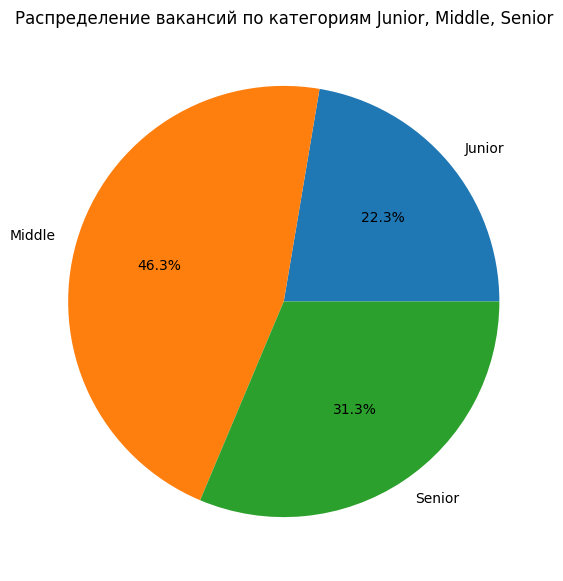

In [80]:

df = pd.read_csv("merged_clean.csv", encoding="utf-8")

# Фильтруем вакансии, где "Название" содержит junior, middle, senior (без учета регистра)
filtered_df = df[df["Название"].str.contains(r"\b(junior|middle|senior)\b", case=False, na=False)]

# Подсчитываем количество вакансий по категориям
category_counts = {
    "Junior": filtered_df["Название"].str.contains(r"\bjunior\b", case=False, na=False).sum(),
    "Middle": filtered_df["Название"].str.contains(r"\bmiddle\b", case=False, na=False).sum(),
    "Senior": filtered_df["Название"].str.contains(r"\bsenior\b", case=False, na=False).sum()
}

# Строим пай-чарт
labels = category_counts.keys()
sizes = category_counts.values()

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Распределение вакансий по категориям Junior, Middle, Senior")
plt.show()


In [81]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("merged_clean.csv", encoding="utf-8")

# Фильтруем вакансии по уровням
junior_df = df[df["Название"].str.contains(r"\bjunior\b", case=False, na=False)]
middle_df = df[df["Название"].str.contains(r"\bmiddle\b", case=False, na=False)]
senior_df = df[df["Название"].str.contains(r"\bsenior\b", case=False, na=False)]

# Извлекаем ключевые навыки для каждого уровня
junior_skills = junior_df["Ключевые навыки"].str.split(",").explode().str.strip().value_counts()
middle_skills = middle_df["Ключевые навыки"].str.split(",").explode().str.strip().value_counts()
senior_skills = senior_df["Ключевые навыки"].str.split(",").explode().str.strip().value_counts()

# Выводим топ-10 самых частых навыков для каждого уровня
print("Топ навыков для Junior:")
print(junior_skills.head(10))
print("\nТоп навыков для Middle:")
print(middle_skills.head(10))
print("\nТоп навыков для Senior:")
print(senior_skills.head(10))


Топ навыков для Junior:
Ключевые навыки
javascript      430
git             339
sql             314
html            282
react           226
vuejs           191
css             188
тестирование    185
typescript      168
postgresql      151
Name: count, dtype: int64

Топ навыков для Middle:
Ключевые навыки
javascript    1017
git            900
sql            652
typescript     617
react          463
postgresql     449
java           391
html           385
vuejs          380
qa             363
Name: count, dtype: int64

Топ навыков для Senior:
Ключевые навыки
javascript    529
typescript    490
sql           402
git           387
react         345
python        254
java          243
kotlin        227
node.js       202
ci/cd         170
Name: count, dtype: int64


Определяем топ-10 наиболее часто встречающихся навыков в вакансиях

In [82]:
import pandas as pd
from collections import Counter



# Разделяем навыки по запятой и "разворачиваем" датафрейм
all_skills = merged_clean['Ключевые навыки'].str.split(',').explode().str.strip()

# Подсчитываем количество каждого навыка
skill_counts = Counter(all_skills)

# Получаем 10 самых популярных навыков
top_10_skills = skill_counts.most_common(11)

# Выводим результаты
print("10 самых востребованных навыков:")
for skill, count in top_10_skills:
    print(f"{skill}: {count}")


10 самых востребованных навыков:
javascript: 3991
sql: 3928
git: 3769
typescript: 2670
react: 2174
python: 2023
java: 1858
postgresql: 1840
html: 1819
тестирование: 1681
функциональное тестирование: 1666


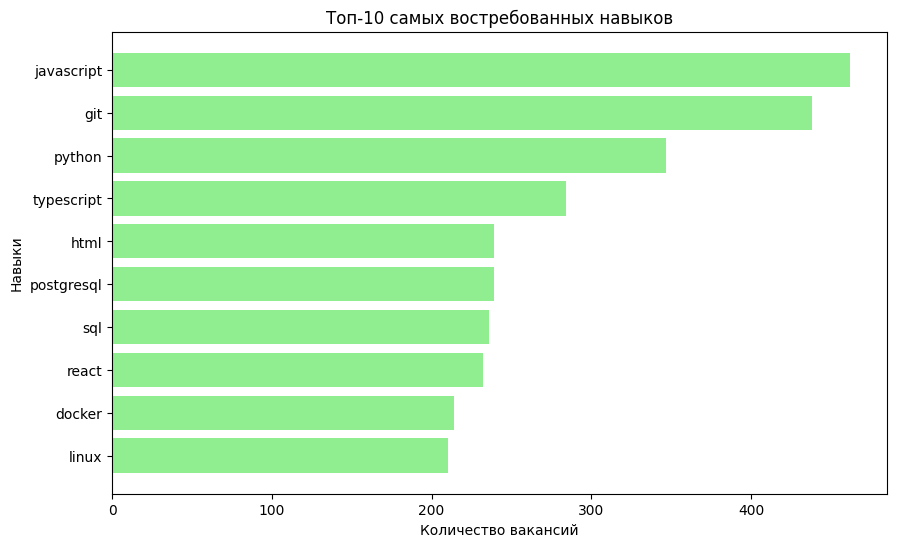

In [83]:
import matplotlib.pyplot as plt


skills = ['javascript', 'git', 'python', 'typescript', 'html',
          'postgresql', 'sql', 'react', 'docker', 'linux']
amount = [462, 438, 347, 284, 239, 239, 236, 232, 214, 210]
plt.figure(figsize=(10, 6))
plt.barh(skills, amount, color='lightgreen')

plt.xlabel('Количество вакансий')
plt.ylabel('Навыки')
plt.title('Топ-10 самых востребованных навыков')
plt.gca().invert_yaxis();


In [39]:
# Преобразуем столбец 'Макс. зарплата (₽)' в числовой формат, заменяя 'Не указано' на NaN
merged_clean['Макс. зарплата (₽)'] = pd.to_numeric(merged_clean['Макс. зарплата (₽)'], errors='coerce')

# Отфильтровываем строки, где 'Макс. зарплата (₽)' не является NaN
filtered_data = merged_clean.dropna(subset=['Макс. зарплата (₽)'])

# Разбиваем столбец 'Ключевые навыки' по запятой и взрываем его
merged_exploded = filtered_data.assign(навык=filtered_data['Ключевые навыки'].str.split(', ')).explode('навык')

# Группируем по навыку и вычисляем среднюю зарплату
avg_salary_per_skill = merged_exploded.groupby('навык')['Макс. зарплата (₽)'].mean().reset_index()

# Сохраняем результат в CSV
avg_salary_per_skill.to_csv('avg_salary_per_skill.csv', index=False, encoding='utf-8-sig')


avg_salary_per_skill


,навык,Макс. зарплата (₽)
0,#начинающий_специалист,50500.0
1,.NET,292500.0
2,.net,320000.0
3,.net 6,300000.0
4,.net 7,300000.0
...,...,...
3242,яндекс.директ,110000.0
3243,ярмарки вакансий,200000.0
3244,• английский язык,230000.0
3245,• кипиа,230000.0


In [84]:
# Подсчитываем количество упоминаний каждого навыка (популярность)
skill_popularity = merged_exploded['навык'].value_counts().reset_index()
skill_popularity.columns = ['навык', 'popularity']

# Объединяем информацию о зарплатах и популярности по навыкам
skills_analysis = pd.merge(avg_salary_per_skill, skill_popularity, on='навык')

# Фильтруем навыки с высокой зарплатой и низкой популярностью
perspective_skills = skills_analysis[
    (skills_analysis['Макс. зарплата (₽)'] > 100000) &  # Высокая зарплата
    (skills_analysis['popularity'] < 5)  # Низкая популярность (например, менее 5 упоминаний)
]

# Печатаем результаты
print("\nПерспективные навыки (высокая зарплата и низкая популярность):")
print(perspective_skills)

# Можно сохранить результат в файл CSV, если нужно
perspective_skills.to_csv('perspective_skills.csv', index=False, encoding='utf-8-sig')



Перспективные навыки (высокая зарплата и низкая популярность):
                          навык  Макс. зарплата (₽)  popularity
1                          .NET            292500.0           4
2                          .net            320000.0           1
3                        .net 6            300000.0           1
4                        .net 7            300000.0           1
6                .net framework            178625.0           4
...                         ...                 ...         ...
3242              яндекс.директ            110000.0           3
3243           ярмарки вакансий            200000.0           2
3244          • английский язык            230000.0           1
3245                    • кипиа            230000.0           1
3246  • программирование ladder            230000.0           1

[1895 rows x 3 columns]


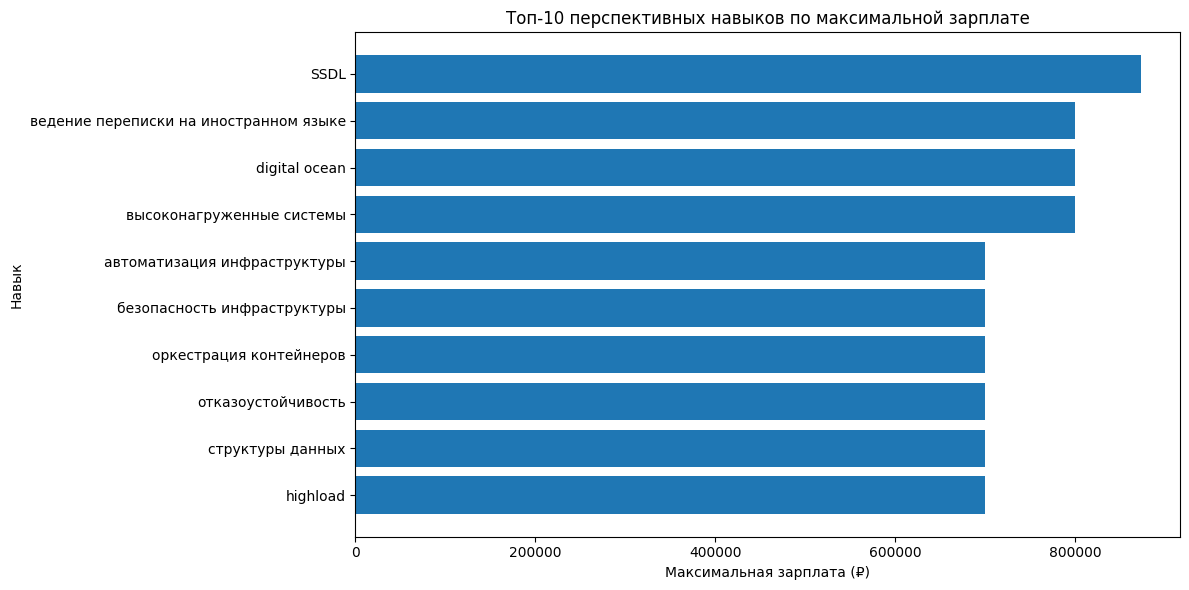

In [85]:
perspective_skills = pd.read_csv('perspective_skills.csv')

top_10_perspective_skills = perspective_skills.sort_values(by='Макс. зарплата (₽)', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.barh(top_10_perspective_skills['навык'], top_10_perspective_skills['Макс. зарплата (₽)'])
plt.xlabel('Максимальная зарплата (₽)')
plt.ylabel('Навык')
plt.title('Топ-10 перспективных навыков по максимальной зарплате')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [86]:
df = pd.read_csv("merged_clean.csv", encoding="utf-8")

# Удаляем строки, где в целевом столбце есть NaN
target_column = "Мин. зарплата (₽)"  # Замени на нужное название столбца
df = df.dropna(subset=[target_column])

# Сохраняем обновленный DataFrame
df.to_csv("vacancies_filtered.csv", index=False)

print("Файл сохранен как vacancies_filtered.csv без строк с пропущенными значениями в целевой переменной")


Файл сохранен как vacancies_filtered.csv без строк с пропущенными значениями в целевой переменной


In [87]:
df.shape

(10784, 9)

In [89]:
merged_clean = pd.read_csv("merged_clean.csv", encoding="utf-8")

# Фильтрация вакансий только для Москвы и Санкт-Петербурга
filtered_df = merged_clean[merged_clean['Локация'].isin(['Москва', 'Санкт-Петербург'])]

# Очистка списка ключевых навыков
filtered_df['Ключевые навыки'] = filtered_df['Ключевые навыки'].str.replace('\s*,\s*', ', ')

# Функция для получения самых популярных навыков
def get_top_10_skills(skills):
    # Преобразуем строку навыков в список
    skill_list = ', '.join(skills.dropna()).split(', ')
    # Подсчитываем частоту каждого навыка
    skill_counts = Counter(skill_list)
    # Сортируем по частоте (от самых популярных) и возвращаем только 10 самых популярных
    most_common_skills = skill_counts.most_common(10)
    return most_common_skills

# Группировка и анализ самых популярных 10 навыков по каждой локации
top_skills_by_city = filtered_df.groupby('Локация')['Ключевые навыки'].apply(get_top_10_skills)

# Вывод результатов
print("10 самых популярных ключевых навыков для вакансий в Москве и Санкт-Петербурге:")
for city, skills in top_skills_by_city.items():
    print(f"\nГород: {city}")
    for skill, count in skills:
        print(f"{skill}: {count} раз")

10 самых популярных ключевых навыков для вакансий в Москве и Санкт-Петербурге:

Город: Москва
sql: 1912 раз
git: 1606 раз
javascript: 1544 раз
typescript: 1264 раз
python: 1205 раз
postgresql: 1004 раз
react: 915 раз
java: 744 раз
linux: 732 раз
api: 693 раз

Город: Санкт-Петербург
javascript: 804 раз
sql: 691 раз
typescript: 651 раз
git: 632 раз
react: 531 раз
html: 456 раз
vuejs: 402 раз
функциональное тестирование: 384 раз
java: 376 раз
postgresql: 362 раз


<ipython-input-89-380c511bead2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Ключевые навыки'] = filtered_df['Ключевые навыки'].str.replace('\s*,\s*', ', ')
